# CMSC 320 A Tutorial

First of all, we need to read the csv file.

In [62]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
titanic = pd.read_csv(r'titanic.csv')

View statistics of passengers

In [63]:
titanic.head()
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Check the null val

In [64]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We can see there are (891-714),(891-204),(891-889) null value in Age,Cabin,Embarked.
For Age, we use AVERAGE to fill the blank.
For Embarked
For Cabin,we will drop this colume soon.

In [65]:
titanic['Age'] =titanic['Age'].fillna(titanic['Age'].mean())
titanic['Embarked'].value_counts()
titanic['Embarked'] =titanic['Embarked'].fillna('S')# 646:168:77

Sex is string type now, convert into 1/0

In [66]:
isMale = {'male':1,'female':0}
titanic['Sex'] = titanic['Sex'].map(isMale)

We cross analyzed Pclass and survival

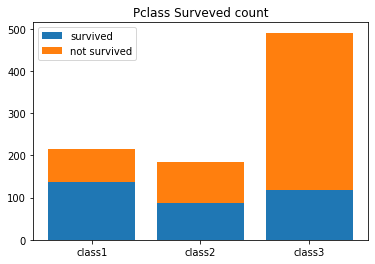

In [67]:
class_survived=titanic[['Pclass','Survived']]
y_live=class_survived[class_survived.Survived==1].groupby('Pclass')['Survived'].count()
y_dead=class_survived[class_survived.Survived==0].groupby('Pclass')['Survived'].count()
pos=range(1,4)
defination=['class%d'%(i) for i in range(1,4)]
plt.bar(pos,y_live,label='survived')
plt.bar(pos,y_dead,bottom=y_live,label='not survived')
plt.legend()
plt.xticks(pos,defination)
plt.title('Pclass Surveved count')
plt.show()



We cross analyzed gender and survival

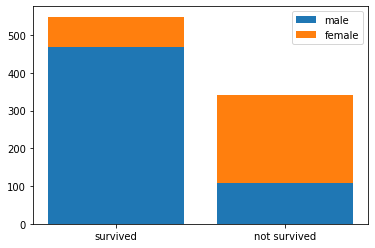

In [68]:
sex_survived=titanic[['Sex','Survived']]
y_male=[0,0] #live/die
y_female=[0,0]#live/die
for i in range(len(sex_survived.Sex)):
    if sex_survived.Sex[i]:#male = 1, famale = 0
        if sex_survived.Survived[i]==0:
            y_male[0]+=1
        else:
            y_male[1]+=1
    else:
        if sex_survived.Survived[i]==0:
            y_female[0]+=1
        else:
            y_female[1]+=1
x_number=range(1,3)
x_word=['survived','not survived']
plt.bar(x_number,y_male,label='male')
plt.bar(x_number,y_female,bottom=y_male,label='female')
plt.legend()
plt.xticks(x_number,x_word)
plt.show()

          Survived    Pclass       Age     SibSp     Parch      Fare       Sex
Survived  1.000000 -0.338481 -0.069809 -0.035322  0.081629  0.257307 -0.543351
Pclass   -0.338481  1.000000 -0.331339  0.083081  0.018443 -0.549500  0.131900
Age      -0.069809 -0.331339  1.000000 -0.232625 -0.179191  0.091566  0.084153
SibSp    -0.035322  0.083081 -0.232625  1.000000  0.414838  0.159651 -0.114631
Parch     0.081629  0.018443 -0.179191  0.414838  1.000000  0.216225 -0.245489
Fare      0.257307 -0.549500  0.091566  0.159651  0.216225  1.000000 -0.182333
Sex      -0.543351  0.131900  0.084153 -0.114631 -0.245489 -0.182333  1.000000


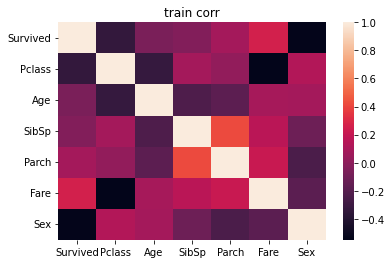

In [69]:
data=titanic[['Survived','Pclass','Age','SibSp','Parch','Fare','Sex']]
data=data.corr()
print(data)
sns.heatmap(data)
plt.title('train corr')
plt.show()

As a continuous variable, fare can also be used for analysis.
We ignore the future warning.

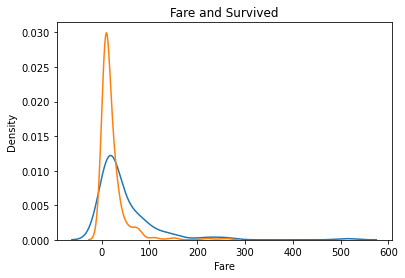

In [70]:
import warnings 
warnings.filterwarnings('ignore')
fare_survived=titanic[['Fare','Survived']]
sns.distplot(fare_survived[fare_survived.Survived==1].Fare,hist=False,label='Survived')
sns.distplot(fare_survived[fare_survived.Survived==0].Fare,hist=False,label='Dead')
plt.title('Fare and Survived')
plt.show()

Family size and title analysis in progress.